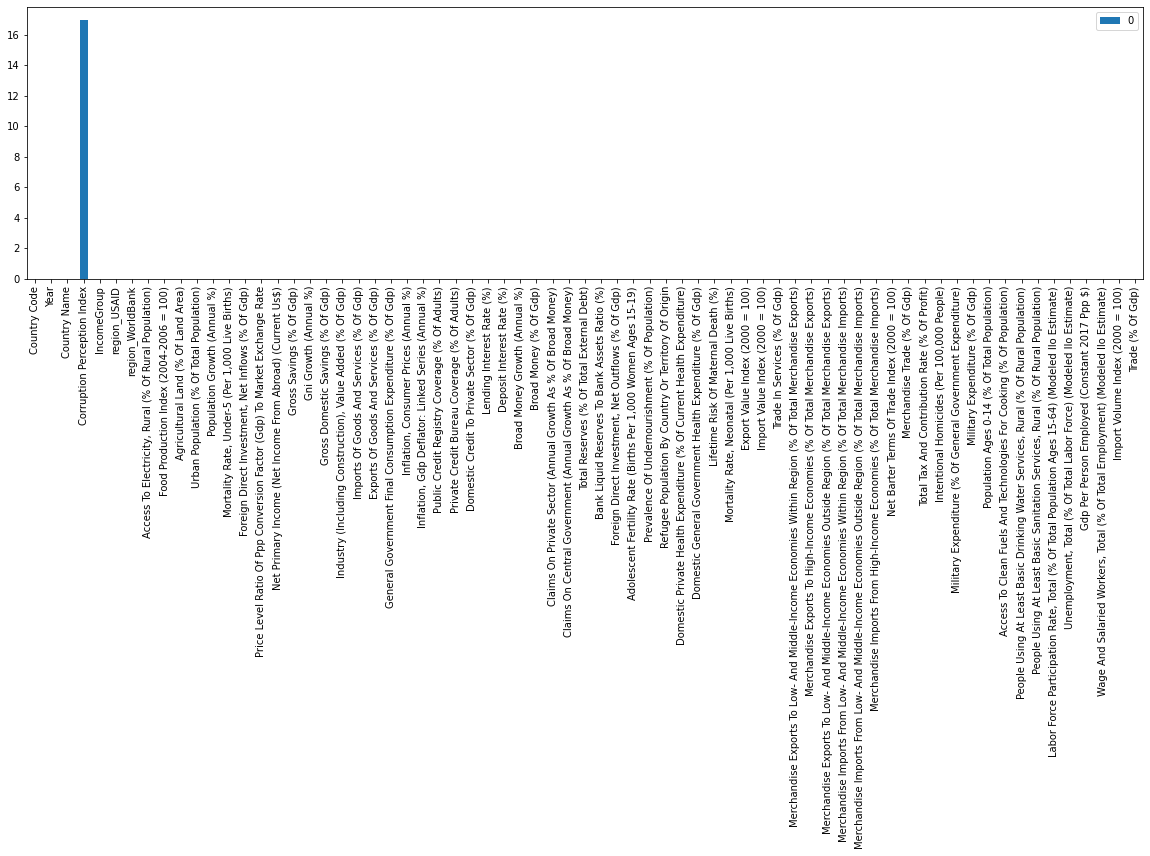

In [1]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Final datasets/World_Bank_development_indicators/before_30percentile_usaid_wb_cpi.csv')
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))
df = df.dropna()

In [2]:
df.columns

Index(['Country Code', 'Year', 'Country Name', 'Corruption Perception Index',
       'IncomeGroup', 'region_USAID', 'region_WorldBank',
       'Access To Electricity, Rural (% Of Rural Population)',
       'Food Production Index (2004-2006 = 100)',
       'Agricultural Land (% Of Land Area)',
       'Urban Population (% Of Total Population)',
       'Population Growth (Annual %)',
       'Mortality Rate, Under-5 (Per 1,000 Live Births)',
       'Foreign Direct Investment, Net Inflows (% Of Gdp)',
       'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
       'Net Primary Income (Net Income From Abroad) (Current Us$)',
       'Gross Savings (% Of Gdp)', 'Gni Growth (Annual %)',
       'Gross Domestic Savings (% Of Gdp)',
       'Industry (Including Construction), Value Added (% Of Gdp)',
       'Imports Of Goods And Services (% Of Gdp)',
       'Exports Of Goods And Services (% Of Gdp)',
       'General Government Final Consumption Expenditure (% Of Gdp)',
   

In [3]:
## Researving this column for the end
df_RWB = df['region_WorldBank']

# dropping unnecessary columns
df.drop(['region_WorldBank','Country Code'],axis=1,inplace=True)
df.dropna()

,Year,Country Name,Corruption Perception Index,IncomeGroup,region_USAID,"Access To Electricity, Rural (% Of Rural Population)",Food Production Index (2004-2006 = 100),Agricultural Land (% Of Land Area),Urban Population (% Of Total Population),Population Growth (Annual %),...,Population Ages 0-14 (% Of Total Population),Access To Clean Fuels And Technologies For Cooking (% Of Population),"People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)","People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)","Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)",Gdp Per Person Employed (Constant 2017 Ppp $),"Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)",Import Volume Index (2000 = 100),Trade (% Of Gdp)
2,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
3,2008,Afghanistan,15.0,Low income,South and Central Asia (SCA),27.954251,100.53000,58.067580,23.320,2.268277,...,48.227151,17.44000,35.969691,28.430922,49.104000,10.985,7213.894886,8.920000,161.947234,60.849345
4,2009,Afghanistan,13.0,Low income,South and Central Asia (SCA),33.378738,116.85000,58.067580,23.528,2.397021,...,48.250411,18.84000,38.233731,29.386377,48.910999,11.387,8627.693985,9.906000,199.383936,49.663426
5,2010,Afghanistan,14.0,Low income,South and Central Asia (SCA),30.218800,115.98000,58.069111,23.737,2.746576,...,48.178145,20.68000,40.524860,30.342450,48.786999,11.484,9623.818908,10.825000,285.262919,52.579600
6,2011,Afghanistan,15.0,Low income,South and Central Asia (SCA),29.572881,110.74000,58.067580,23.948,3.143126,...,47.701590,22.33000,42.843080,31.299143,48.993000,11.488,9245.217804,11.617000,309.638395,57.655172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,2015,Zambia,38.0,Lower middle income,Sub-Saharan Africa (SSA),4.697572,180.40000,32.063923,41.907,3.066875,...,46.184516,16.31000,40.588167,18.141116,75.802002,10.105,9469.614628,21.038000,578.340085,84.315572
927,2016,Zambia,38.0,Lower middle income,Sub-Saharan Africa (SSA),9.305717,179.77000,32.063923,42.438,3.003346,...,45.838325,16.43000,41.176027,18.603971,75.675003,10.882,9574.589725,21.202000,556.788892,73.958535
928,2017,Zambia,37.0,Lower middle income,Sub-Saharan Africa (SSA),13.997699,171.55394,32.476466,42.976,2.951583,...,45.411369,16.75112,41.952058,18.932012,75.505997,11.626,9648.782217,21.349001,567.892902,71.585759
929,2018,Zambia,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216


In [4]:
#### PRE PROCESSING ###

In [5]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels, we will only do it for columns where we see a level, it is in order  
label_encoder = preprocessing.LabelEncoder()
df['IncomeGroup']= label_encoder.fit_transform(df['IncomeGroup'])

In [6]:
#Categorical Columns

object_type = df.select_dtypes(include=['object']).columns.to_list()
print(object_type)

['Country Name', 'region_USAID']


In [8]:
## Seperating the data. 

y = df[['Corruption Perception Index']]
X = df.drop(['Corruption Perception Index'],axis=1, inplace = True)

#one hot encoding the coulmns 
X = pd.get_dummies(df)


# SCALING THE DATA
#we will see if this helps in the end
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
#drop region world bank when doing modelling and don't use index
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#Model Fitting

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/vibhuverma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))






2.632258064516129
0.7959509211452711
13.896774193548387


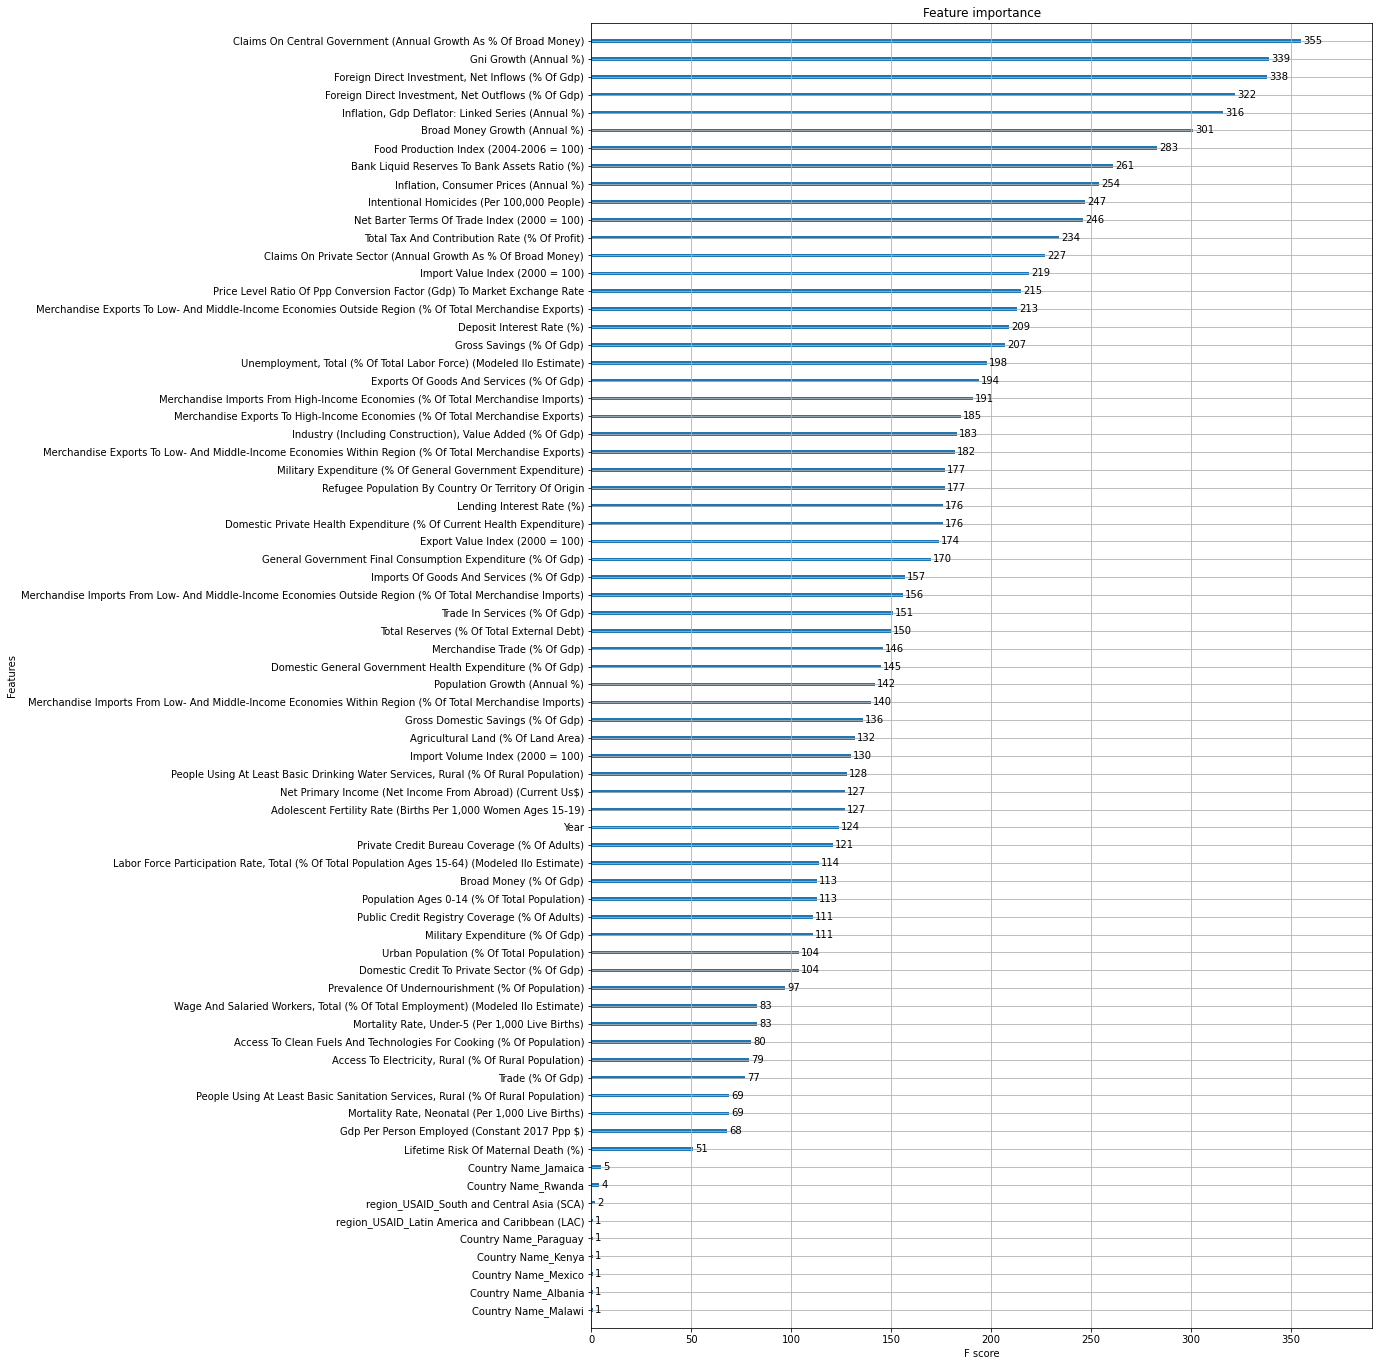

In [12]:
# plot feature importance
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 24)
plot_importance(model)